## Loading Libraries

In [55]:
library(SASxport)
library(dplyr)
library(IDPmisc)
library(repr)

## Importing demographic data

In [2]:
pdemo = read.xport('/Users/silviacatalina/Google Drive/BethelTech/GitHub/FinalProject/Data/P_DEMO.XPT')
#pdemo %>% group_by(RIDAGEMN)%>% summarise(n=n())
head(pdemo)
label(pdemo)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,⋯,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,WTINTPRP,WTMECPRP,SDMVPSU,SDMVSTRA,INDFMPIR
,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,⋯,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>
1,109263,66,2,1,2,NA,5,6,2,1,⋯,2,NA,NA,NA,NA,7891.762,8951.816,3,156,4.66
2,109264,66,2,2,13,NA,1,1,2,1,⋯,2,1,2,2,1,11689.747,12271.157,1,155,0.83
3,109265,66,2,1,2,NA,3,3,2,1,⋯,2,NA,NA,NA,NA,16273.826,16658.764,1,157,3.06
4,109266,66,2,2,29,NA,5,6,2,2,⋯,2,1,2,2,1,7825.646,8154.968,2,168,5.00
5,109267,66,1,2,21,NA,2,2,NA,2,⋯,2,NA,NA,NA,NA,26379.992,0.000,1,156,5.00
6,109268,66,1,2,18,NA,3,3,NA,1,⋯,2,NA,NA,NA,NA,19639.221,0.000,1,155,1.66


SEQN 
              "Respondent sequence number" 
                                  SDDSRVYR 
                      "Data release cycle" 
                                  RIDSTATR 
            "Interview/Examination status" 
                                  RIAGENDR 
                                  "Gender" 
                                  RIDAGEYR 
               "Age in years at screening" 
                                  RIDAGEMN 
"Age in months at screening - 0 to 24 mos" 
                                  RIDRETH1 
                    "Race/Hispanic origin" 
                                  RIDRETH3 
        "Race/Hispanic origin w/ NH Asian" 
                                  RIDEXMON 
                   "Six month time period" 
                                  DMDBORN4 
                        "Country of birth" 
                                  DMDYRUSZ 
                    "Length of time in US" 
                                  DMDEDUC2 
            "Education level - Adults 20+" 
                                  DMDMARTZ 
                          "Marital status" 
                                  RIDEXPRG 
                "Pregnancy status at exam" 
                                   SIALANG 
                "Language of SP Interview" 
                                  SIAPROXY 
             "Proxy used in SP Interview?" 
                                  SIAINTRP 
       "Interpreter used in SP Interview?" 
                                   FIALANG 
            "Language of Family Interview" 
                                  FIAPROXY 
         "Proxy used in Family Interview?" 
                                  FIAINTRP 
   "Interpreter used in Family Interview?" 
                                   MIALANG 
               "Language of MEC Interview" 
                                  MIAPROXY 
            "Proxy used in MEC Interview?" 
                                  MIAINTRP 
      "Interpreter used in MEC Interview?" 
                                  AIALANGA 
             "Language of ACASI Interview" 
                                  WTINTPRP 
            "Full sample interview weight" 
                                  WTMECPRP 
             "Full sample MEC exam weight" 
                                   SDMVPSU 
              "Masked variance pseudo-PSU" 
                                  SDMVSTRA 
          "Masked variance pseudo-stratum" 
                                  INDFMPIR 
       "Ratio of family income to poverty"

## Subsetting demographic data

In [3]:
keep = c('SEQN','RIAGENDR','RIDAGEYR','RIDRETH3')
pdemo1 = pdemo[keep]
head(pdemo1)

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3
,<labelled>,<labelled>,<labelled>,<labelled>
1,109263,1,2,6
2,109264,2,13,1
3,109265,1,2,3
4,109266,2,29,6
5,109267,2,21,2
6,109268,2,18,3


## Importing blood pressure measurements

In [8]:
bp = read.xport('/Users/silviacatalina/Google Drive/BethelTech/GitHub/FinalProject/Data/P_BPXO.XPT')
head(bp)
label(bp)

,SEQN,BPAOARM,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,BPXOPLS2,BPXOPLS3
,<labelled>,<fct>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>
1,109264,R,3,109,67,109,68,106,66,94,95,91
2,109266,R,4,99,56,99,55,99,52,68,66,66
3,109270,R,3,123,73,124,77,127,70,95,98,93
4,109271,R,4,102,65,108,68,111,68,73,71,70
5,109273,R,3,116,68,110,66,115,68,71,70,70
6,109274,NA,3,138,70,132,69,132,71,NA,NA,NA


SEQN                                 BPAOARM 
           "Respondent sequence number"          "Arm selected - oscillometric" 
                                BPAOCSZ                                 BPXOSY1 
      "Coded cuff size - oscillometric"  "Systolic - 1st oscillometric reading" 
                                BPXODI1                                 BPXOSY2 
"Diastolic - 1st oscillometric reading"  "Systolic - 2nd oscillometric reading" 
                                BPXODI2                                 BPXOSY3 
"Diastolic - 2nd oscillometric reading"  "Systolic - 3rd oscillometric reading" 
                                BPXODI3                                BPXOPLS1 
"Diastolic - 3rd oscillometric reading"     "Pulse - 1st oscillometric reading" 
                               BPXOPLS2                                BPXOPLS3 
    "Pulse - 2nd oscillometric reading"     "Pulse - 3rd oscillometric reading"

## Adding columns with average measurements (taken 60 seconds apart)

In [9]:
bp$bps = round((bp$BPXOSY1 + bp$BPXOSY2 + bp$BPXOSY3)/3)
label(bp$bps) = "Systolic - 3 reading average"
bp$bpd = round((bp$BPXODI1 + bp$BPXODI2 + bp$BPXODI3)/3)
label(bp$bpd) = "Diastolic - 3 reading average"
head(bp)
label(bp)

,SEQN,BPAOARM,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,BPXOPLS2,BPXOPLS3,bps,bpd
,<labelled>,<fct>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>
1,109264,R,3,109,67,109,68,106,66,94,95,91,108,67
2,109266,R,4,99,56,99,55,99,52,68,66,66,99,54
3,109270,R,3,123,73,124,77,127,70,95,98,93,125,73
4,109271,R,4,102,65,108,68,111,68,73,71,70,107,67
5,109273,R,3,116,68,110,66,115,68,71,70,70,114,67
6,109274,NA,3,138,70,132,69,132,71,NA,NA,NA,134,70


SEQN                                 BPAOARM 
           "Respondent sequence number"          "Arm selected - oscillometric" 
                                BPAOCSZ                                 BPXOSY1 
      "Coded cuff size - oscillometric"  "Systolic - 1st oscillometric reading" 
                                BPXODI1                                 BPXOSY2 
"Diastolic - 1st oscillometric reading"  "Systolic - 2nd oscillometric reading" 
                                BPXODI2                                 BPXOSY3 
"Diastolic - 2nd oscillometric reading"  "Systolic - 3rd oscillometric reading" 
                                BPXODI3                                BPXOPLS1 
"Diastolic - 3rd oscillometric reading"     "Pulse - 1st oscillometric reading" 
                               BPXOPLS2                                BPXOPLS3 
    "Pulse - 2nd oscillometric reading"     "Pulse - 3rd oscillometric reading" 
                                    bps                                     bpd 
         "Systolic - 3 reading average"         "Diastolic - 3 reading average"

## Subsetting blood pressure measurements

In [10]:
keep = c('SEQN', 'bps', 'bpd')
bp1 = bp[keep]
head(bp1)

,SEQN,bps,bpd
,<labelled>,<labelled>,<labelled>
1,109264,108,67
2,109266,99,54
3,109270,125,73
4,109271,107,67
5,109273,114,67
6,109274,134,70


## Inner join of demographic and blood pressure data

In [11]:
dfmerged = merge(pdemo1,bp1)
head(dfmerged)
label(dfmerged)

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,bps,bpd
,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>
1,109264,2,13,1,108,67
2,109266,2,29,6,99,54
3,109270,2,11,4,125,73
4,109271,1,49,3,107,67
5,109273,1,36,3,114,67
6,109274,1,68,7,134,70


SEQN                           RIAGENDR 
      "Respondent sequence number"                           "Gender" 
                          RIDAGEYR                           RIDRETH3 
       "Age in years at screening" "Race/Hispanic origin w/ NH Asian" 
                               bps                                bpd 
    "Systolic - 3 reading average"    "Diastolic - 3 reading average"

## Importing body measurement data

In [12]:
body = read.xport('/Users/silviacatalina/Google Drive/BethelTech/GitHub/FinalProject/Data/P_BMX.XPT')
head(body)
label(body)

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,⋯,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP
,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,⋯,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>
1,109263,4,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,109264,1,42.2,NA,NA,NA,NA,NA,154.7,NA,⋯,36.3,NA,33.8,NA,22.7,NA,63.8,NA,85.0,NA
3,109265,1,12.0,NA,91.6,NA,NA,NA,89.3,NA,⋯,NA,NA,18.6,NA,14.8,NA,41.2,NA,NA,NA
4,109266,1,97.1,NA,NA,NA,NA,NA,160.2,NA,⋯,40.8,NA,34.7,NA,35.8,NA,117.9,NA,126.1,NA
5,109269,3,13.6,NA,90.9,NA,NA,NA,NA,1,⋯,NA,NA,NA,1,NA,1,NA,1,NA,NA
6,109270,1,75.3,NA,NA,NA,NA,NA,156.0,NA,⋯,42.6,NA,36.1,NA,31.0,NA,91.4,NA,NA,NA


SEQN                              BMDSTATS 
         "Respondent sequence number" "Body Measures Component Status Code" 
                                BMXWT                                 BMIWT 
                        "Weight (kg)"                      "Weight Comment" 
                             BMXRECUM                              BMIRECUM 
              "Recumbent Length (cm)"            "Recumbent Length Comment" 
                              BMXHEAD                               BMIHEAD 
            "Head Circumference (cm)"          "Head Circumference Comment" 
                                BMXHT                                 BMIHT 
               "Standing Height (cm)"             "Standing Height Comment" 
                               BMXBMI                               BMDBMIC 
          "Body Mass Index (kg/m**2)"       "BMI Category - Children/Youth" 
                               BMXLEG                                BMILEG 
              "Upper Leg Length (cm)"            "Upper Leg Length Comment" 
                              BMXARML                               BMIARML 
              "Upper Arm Length (cm)"            "Upper Arm Length Comment" 
                              BMXARMC                               BMIARMC 
             "Arm Circumference (cm)"           "Arm Circumference Comment" 
                             BMXWAIST                              BMIWAIST 
           "Waist Circumference (cm)"         "Waist Circumference Comment" 
                               BMXHIP                                BMIHIP 
             "Hip Circumference (cm)"           "Hip Circumference Comment"

## Subsetting body measurement data

In [13]:
keep = c('SEQN','BMXWT','BMXHT','BMXBMI','BMXWAIST')
body1 = body[keep]
head(body1)

,SEQN,BMXWT,BMXHT,BMXBMI,BMXWAIST
,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>
1,109263,NA,NA,NA,NA
2,109264,42.2,154.7,17.6,63.8
3,109265,12.0,89.3,15.0,41.2
4,109266,97.1,160.2,37.8,117.9
5,109269,13.6,NA,NA,NA
6,109270,75.3,156.0,30.9,91.4


## Adding body measurements to merged dataframe

In [14]:
dfmerged1 = merge(dfmerged, body1)
head(dfmerged1)

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,bps,bpd,BMXWT,BMXHT,BMXBMI,BMXWAIST
,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>
1,109264,2,13,1,108,67,42.2,154.7,17.6,63.8
2,109266,2,29,6,99,54,97.1,160.2,37.8,117.9
3,109270,2,11,4,125,73,75.3,156.0,30.9,91.4
4,109271,1,49,3,107,67,98.8,182.3,29.7,120.4
5,109273,1,36,3,114,67,74.3,184.2,21.9,86.8
6,109274,1,68,7,134,70,103.7,185.3,30.2,109.6


## Importing blood pressure and cholesterol questionnaire data

In [15]:
bpchol = read.xport('/Users/silviacatalina/Google Drive/BethelTech/GitHub/FinalProject/Data/P_BPQ.XPT')
head(bpchol)
label(bpchol)

,SEQN,BPQ020,BPQ030,BPD035,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D
,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>
1,109266,2,NA,NA,NA,NA,1,NA,1,2,NA
2,109267,2,NA,NA,NA,NA,2,1,2,2,NA
3,109268,2,NA,NA,NA,NA,2,9,NA,NA,NA
4,109271,2,NA,NA,NA,NA,1,NA,1,1,1
5,109273,2,NA,NA,NA,NA,2,1,4,2,NA
6,109274,1,1,54,1,1,1,NA,1,1,1


SEQN 
              "Respondent sequence number" 
                                    BPQ020 
   "Ever told you had high blood pressure" 
                                    BPQ030 
 "Told had high blood pressure - 2+ times" 
                                    BPD035 
               "Age told had hypertension" 
                                   BPQ040A 
    "Taking prescription for hypertension" 
                                   BPQ050A 
  "Now taking prescribed medicine for HBP" 
                                    BPQ080 
"Doctor told you - high cholesterol level" 
                                    BPQ060 
      "Ever had blood cholesterol checked" 
                                    BPQ070 
     "When blood cholesterol last checked" 
                                   BPQ090D 
 "Told to take prescriptn for cholesterol" 
                                   BPQ100D 
          "Now taking prescribed medicine"

## Subsetting blood pressure and cholesterol questionnaire data

In [26]:
keep = c('SEQN','BPQ020','BPQ080')
bpchol1 = bpchol[keep]
head(bpchol1)

,SEQN,BPQ020,BPQ080
,<labelled>,<labelled>,<labelled>
1,109266,2,1
2,109267,2,2
3,109268,2,2
4,109271,2,1
5,109273,2,2
6,109274,1,1


### Define "7 - Refused" and "9 - Don't know" responses as NAs

In [28]:
bpchol1$BPQ020[bpchol1$BPQ020 == 9] = NA
bpchol1$BPQ080[bpchol1$BPQ080 == 9] = NA
bpchol1$BPQ080[bpchol1$BPQ080 == 7] = NA
unique(bpchol1$BPQ020)
unique(bpchol1$BPQ080)

[1]  2  1 NA

[1]  1  2 NA

## Adding blood pressure and cholesterol questionnaire data to merged dataframe

In [29]:
dfmerged2 = merge(dfmerged1, bpchol1)
head(dfmerged2)

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,bps,bpd,BMXWT,BMXHT,BMXBMI,BMXWAIST,BPQ020,BPQ080
,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>
1,109266,2,29,6,99,54,97.1,160.2,37.8,117.9,2,1
2,109271,1,49,3,107,67,98.8,182.3,29.7,120.4,2,1
3,109273,1,36,3,114,67,74.3,184.2,21.9,86.8,2,2
4,109274,1,68,7,134,70,103.7,185.3,30.2,109.6,1,1
5,109279,2,17,3,101,61,55.3,162.2,21.0,77.4,2,2
6,109282,1,76,3,139,73,83.3,177.1,26.6,NA,1,1


## Importing diabetes questionnaire data

In [30]:
dm = read.xport('/Users/silviacatalina/Google Drive/BethelTech/GitHub/FinalProject/Data/P_DIQ.XPT')
head(dm)
label(dm)

,SEQN,DIQ010,DID040,DIQ160,DIQ180,DIQ050,DID060,DIQ060U,DIQ070,DIQ230,⋯,DIQ300D,DID310S,DID310D,DID320,DID330,DID341,DID350,DIQ350U,DIQ360,DIQ080
,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,⋯,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>
1,109263,2,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,109264,2,NA,2,2,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,109265,2,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,109266,2,NA,1,1,NA,NA,NA,2,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,109267,2,NA,2,2,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,109268,2,NA,2,2,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


SEQN 
              "Respondent sequence number" 
                                    DIQ010 
           "Doctor told you have diabetes" 
                                    DID040 
    "Age when first told you had diabetes" 
                                    DIQ160 
          "Ever told you have prediabetes" 
                                    DIQ180 
       "Had blood tested past three years" 
                                    DIQ050 
                      "Taking insulin now" 
                                    DID060 
                 "How long taking insulin" 
                                   DIQ060U 
            "Unit of measure (month/year)" 
                                    DIQ070 
"Take diabetic pills to lower blood sugar" 
                                    DIQ230 
  "How long ago saw a diabetes specialist" 
                                    DIQ240 
    "Is there one Dr you see for diabetes" 
                                    DID250 
    "Past year how many times seen doctor" 
                                    DID260 
 "How often check blood for glucose/sugar" 
                                   DIQ260U 
   "Unit of measure (day/week/month/year)" 
                                    DIQ275 
            "Past year Dr checked for A1C" 
                                    DIQ280 
            "What was your last A1C level" 
                                    DIQ291 
          "What does Dr say A1C should be" 
                                   DIQ300S 
                "What was your recent SBP" 
                                   DIQ300D 
                "What was your recent DBP" 
                                   DID310S 
          "What does Dr say SBP should be" 
                                   DID310D 
          "What does Dr say DBP should be" 
                                    DID320 
         "What was most recent LDL number" 
                                    DID330 
          "What does Dr say LDL should be" 
                                    DID341 
 "Past year times Dr check feet for sores" 
                                    DID350 
        "How often do you check your feet" 
                                   DIQ350U 
   "Unit of measure (day/week/month/year)" 
                                    DIQ360 
   "Last time had pupils dilated for exam" 
                                    DIQ080 
  "Diabetes affected eyes/had retinopathy"

## Subsetting diabetes questionnaire data

In [31]:
keep = c('SEQN','DIQ010')
dm1 = dm[keep]
head(dm1)

,SEQN,DIQ010
,<labelled>,<labelled>
1,109263,2
2,109264,2
3,109265,2
4,109266,2
5,109267,2
6,109268,2


### Recoding answers to 1-Yes/2-No/NA

In [32]:
unique(dm1$DIQ010)

[1] 2 1 3 9

* 3-Borderline, recoded to 2-No
* 9-Don't know, recoded to NA

In [34]:
dm1$DIQ010[dm1$DIQ010 == 3] = 2
dm1$DIQ010[dm1$DIQ010 == 9] = NA
unique(dm1$DIQ010)

[1]  2  1 NA

## Adding diabetes questionnaire data to merged dataframe

In [35]:
dfmerged3 = merge(dfmerged2, dm1)
head(dfmerged3)

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,bps,bpd,BMXWT,BMXHT,BMXBMI,BMXWAIST,BPQ020,BPQ080,DIQ010
,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>
1,109266,2,29,6,99,54,97.1,160.2,37.8,117.9,2,1,2
2,109271,1,49,3,107,67,98.8,182.3,29.7,120.4,2,1,2
3,109273,1,36,3,114,67,74.3,184.2,21.9,86.8,2,2,2
4,109274,1,68,7,134,70,103.7,185.3,30.2,109.6,1,1,1
5,109279,2,17,3,101,61,55.3,162.2,21.0,77.4,2,2,2
6,109282,1,76,3,139,73,83.3,177.1,26.6,NA,1,1,2


## Importing glucose measurement data

In [36]:
fastgbs = read.xport('/Users/silviacatalina/Google Drive/BethelTech/GitHub/FinalProject/Data/P_GLU.XPT')
head(fastgbs)
label(fastgbs)

,SEQN,WTSAFPRP,LBXGLU,LBDGLUSI
,<labelled>,<labelled>,<labelled>,<labelled>
1,109264,27533.17,97,5.38
2,109271,18100.97,103,5.72
3,109274,16281.76,154,8.55
4,109277,32230.05,92,5.11
5,109282,79007.10,95,5.27
6,109286,0.00,92,5.11


SEQN                     WTSAFPRP 
"Respondent sequence number"   "Fasting Subsample Weight" 
                      LBXGLU                     LBDGLUSI 
   "Fasting Glucose (mg/dL)"   "Fasting Glucose (mmol/L)"

## Subsetting glucose measurement data

In [37]:
keep = c('SEQN','LBXGLU')
fastgbs1 = fastgbs[keep]
head(fastgbs1)

,SEQN,LBXGLU
,<labelled>,<labelled>
1,109264,97
2,109271,103
3,109274,154
4,109277,92
5,109282,95
6,109286,92


## Adding glucose measurements do merged dataframe

In [38]:
dfmerged4 = merge(dfmerged3, fastgbs1)
head(dfmerged4)
label(dfmerged4)

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,bps,bpd,BMXWT,BMXHT,BMXBMI,BMXWAIST,BPQ020,BPQ080,DIQ010,LBXGLU
,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>
1,109271,1,49,3,107,67,98.8,182.3,29.7,120.4,2,1,2,103
2,109274,1,68,7,134,70,103.7,185.3,30.2,109.6,1,1,1,154
3,109282,1,76,3,139,73,83.3,177.1,26.6,NA,1,1,2,95
4,109286,2,33,6,NA,NA,72.6,158.4,28.9,NA,2,2,2,92
5,109290,2,68,4,121,60,73.0,161.2,28.1,92.0,1,2,1,106
6,109292,1,58,2,138,97,86.0,167.8,30.5,108.3,1,1,1,181


SEQN 
              "Respondent sequence number" 
                                  RIAGENDR 
                                  "Gender" 
                                  RIDAGEYR 
               "Age in years at screening" 
                                  RIDRETH3 
        "Race/Hispanic origin w/ NH Asian" 
                                       bps 
            "Systolic - 3 reading average" 
                                       bpd 
           "Diastolic - 3 reading average" 
                                     BMXWT 
                             "Weight (kg)" 
                                     BMXHT 
                    "Standing Height (cm)" 
                                    BMXBMI 
               "Body Mass Index (kg/m**2)" 
                                  BMXWAIST 
                "Waist Circumference (cm)" 
                                    BPQ020 
   "Ever told you had high blood pressure" 
                                    BPQ080 
"Doctor told you - high cholesterol level" 
                                    DIQ010 
           "Doctor told you have diabetes" 
                                    LBXGLU 
                 "Fasting Glucose (mg/dL)"

## Removing NAs

In [44]:
dfmerged4na = NaRV.omit(dfmerged4)
str(dfmerged4na)

'data.frame':	3777 obs. of  14 variables:
 $ SEQN    : 'labelled' int  109271 109274 109290 109292 109297 109300 109305 109307 109313 109317 ...
  ..- attr(*, "label")= chr "Respondent sequence number"
 $ RIAGENDR: 'labelled' int  1 1 2 1 2 2 1 1 1 2 ...
  ..- attr(*, "label")= chr "Gender"
 $ RIDAGEYR: 'labelled' int  49 68 68 58 30 54 55 47 63 28 ...
  ..- attr(*, "label")= chr "Age in years at screening"
 $ RIDRETH3: 'labelled' int  3 7 4 2 6 6 6 6 3 4 ...
  ..- attr(*, "label")= chr "Race/Hispanic origin w/ NH Asian"
 $ bps     : 'labelled' num  107 134 121 138 104 162 120 115 109 110 ...
  ..- attr(*, "label")= chr "Systolic - 3 reading average"
 $ bpd     : 'labelled' num  67 70 60 97 70 94 75 68 71 74 ...
  ..- attr(*, "label")= chr "Diastolic - 3 reading average"
 $ BMXWT   : 'labelled' num  98.8 103.7 73 86 55.4 ...
  ..- attr(*, "label")= chr "Weight (kg)"
 $ BMXHT   : 'labelled' num  182 185 161 168 155 ...
  ..- attr(*, "label")= chr "Standing Height (cm)"
 $ BMXBMI  : 'lab

## Estimating risk for cardiovascular disease based on having one or more of the following:
* High Cholesterol
* High Blood Pressure/Hypertension
* Diabetes

## Notes 
* a BMI >= 25 combined with two or more risk factors increases the risk for heart disease  ([Cleveland Clinic](https://my.clevelandclinic.org/health/articles/17308-obesity--heart-disease))
* Smoking increases risk of heart disease significantly, but it is not included in the NHANES survey data

In [45]:
dfmerged4na$cvd_risk = ifelse(dfmerged4na$BPQ080 == 1, 1, ifelse(dfmerged4na$BPQ020 == 1, 1, ifelse(dfmerged4na$DIQ010 == 1, 1, 0)))
label(dfmerged4na$cvd_risk) = "Estimated risk for cardiovascular disease"
head(dfmerged4na)

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,bps,bpd,BMXWT,BMXHT,BMXBMI,BMXWAIST,BPQ020,BPQ080,DIQ010,LBXGLU,cvd_risk
,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>
1,109271,1,49,3,107,67,98.8,182.3,29.7,120.4,2,1,2,103,1
2,109274,1,68,7,134,70,103.7,185.3,30.2,109.6,1,1,1,154,1
5,109290,2,68,4,121,60,73.0,161.2,28.1,92.0,1,2,1,106,1
6,109292,1,58,2,138,97,86.0,167.8,30.5,108.3,1,1,1,181,1
7,109297,2,30,6,104,70,55.4,154.6,23.2,73.2,2,2,2,92,0
8,109300,2,54,6,162,94,62.0,144.7,29.6,84.8,2,2,2,103,0


In [52]:
table(dfmerged4na$cvd_risk)


   0    1 
1824 1953 

In [46]:
names(dfmerged4na)= c('id', 'gender', 'ageYr', 'ethnicity', 'bps', 'bpd', 'weight', 'height', 'bmi','waist', 'hx_htn', 'hx_hichol', 'hx_dm', 'fastgbs','cvd_risk')
head(dfmerged4na)

,id,gender,ageYr,ethnicity,bps,bpd,weight,height,bmi,waist,hx_htn,hx_hichol,hx_dm,fastgbs,cvd_risk
,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>,<labelled>
1,109271,1,49,3,107,67,98.8,182.3,29.7,120.4,2,1,2,103,1
2,109274,1,68,7,134,70,103.7,185.3,30.2,109.6,1,1,1,154,1
5,109290,2,68,4,121,60,73.0,161.2,28.1,92.0,1,2,1,106,1
6,109292,1,58,2,138,97,86.0,167.8,30.5,108.3,1,1,1,181,1
7,109297,2,30,6,104,70,55.4,154.6,23.2,73.2,2,2,2,92,0
8,109300,2,54,6,162,94,62.0,144.7,29.6,84.8,2,2,2,103,0


In [47]:
label(dfmerged4na)

id 
               "Respondent sequence number" 
                                     gender 
                                   "Gender" 
                                      ageYr 
                "Age in years at screening" 
                                  ethnicity 
         "Race/Hispanic origin w/ NH Asian" 
                                        bps 
             "Systolic - 3 reading average" 
                                        bpd 
            "Diastolic - 3 reading average" 
                                     weight 
                              "Weight (kg)" 
                                     height 
                     "Standing Height (cm)" 
                                        bmi 
                "Body Mass Index (kg/m**2)" 
                                      waist 
                 "Waist Circumference (cm)" 
                                     hx_htn 
    "Ever told you had high blood pressure" 
                                  hx_hichol 
 "Doctor told you - high cholesterol level" 
                                      hx_dm 
            "Doctor told you have diabetes" 
                                    fastgbs 
                  "Fasting Glucose (mg/dL)" 
                                   cvd_risk 
"Estimated risk for cardiovascular disease"

In [48]:
str(dfmerged4na)

'data.frame':	3777 obs. of  15 variables:
 $ id       : 'labelled' int  109271 109274 109290 109292 109297 109300 109305 109307 109313 109317 ...
  ..- attr(*, "label")= chr "Respondent sequence number"
 $ gender   : 'labelled' int  1 1 2 1 2 2 1 1 1 2 ...
  ..- attr(*, "label")= chr "Gender"
 $ ageYr    : 'labelled' int  49 68 68 58 30 54 55 47 63 28 ...
  ..- attr(*, "label")= chr "Age in years at screening"
 $ ethnicity: 'labelled' int  3 7 4 2 6 6 6 6 3 4 ...
  ..- attr(*, "label")= chr "Race/Hispanic origin w/ NH Asian"
 $ bps      : 'labelled' num  107 134 121 138 104 162 120 115 109 110 ...
  ..- attr(*, "label")= chr "Systolic - 3 reading average"
 $ bpd      : 'labelled' num  67 70 60 97 70 94 75 68 71 74 ...
  ..- attr(*, "label")= chr "Diastolic - 3 reading average"
 $ weight   : 'labelled' num  98.8 103.7 73 86 55.4 ...
  ..- attr(*, "label")= chr "Weight (kg)"
 $ height   : 'labelled' num  182 185 161 168 155 ...
  ..- attr(*, "label")= chr "Standing Height (cm)"
 $ bmi   

In [53]:
write.csv(dfmerged4na,'/Users/silviacatalina/Google Drive/BethelTech/GitHub/FinalProject/Data/R_NHANES.csv', row.names = FALSE)

In [85]:
options(repr.plot.width=20, repr.plot.height=20)

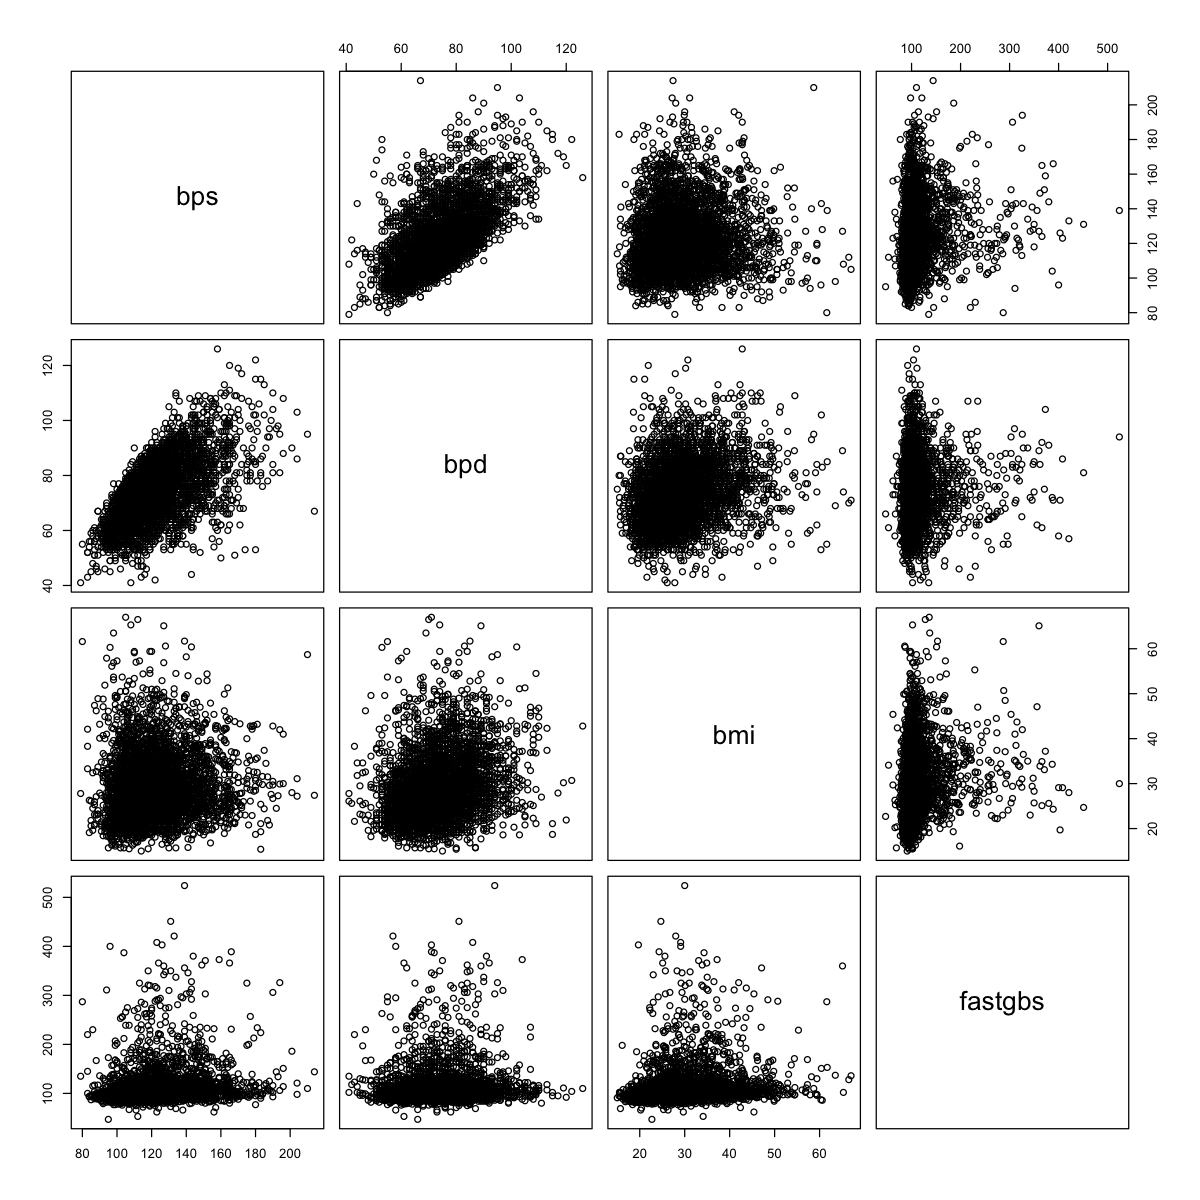

In [57]:
options(repr.plot.width=10, repr.plot.height=10)
pairs(~ bps + bpd + bmi + fastgbs, data=dfmerged4na)